<a href="https://colab.research.google.com/github/Yusuprozimemet/GPS_Ancestry_Migration_Map/blob/main/illustrativeDNA_full_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import json
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

# Load the data
with open('data.json', 'r') as file:
    data = json.load(file)

# Prepare data
regions = []
continents = []
periods = ['Bronze Age', 'Iron Age', 'Late Antiquity', 'Middle Ages']
values = {period: [] for period in periods}

for continent, subregions in data.items():
    for region, period_data in subregions.items():
        region_name = f"{region} ({continent})"
        regions.append(region_name)
        continents.append(continent)
        for period in periods:
            values[period].append(period_data[period])

# Create a DataFrame for easier manipulation
df = pd.DataFrame(values, index=regions)
df['Continent'] = continents

# 1. Grouped Bar Chart
fig1 = go.Figure()
for period in periods:
    fig1.add_trace(go.Bar(
        x=regions,
        y=values[period],
        name=period,
        text=[f'{x:.1f}' for x in values[period]],
        textposition='auto'
    ))

fig1.update_layout(
    title='Values by Region and Time Period',
    xaxis_title='Regions',
    yaxis_title='Values',
    barmode='group',
    xaxis={'tickangle': -45},
    height=600,
    margin=dict(b=200),
    updatemenus=[dict(
        buttons=[
            dict(label="All", method="update", args=[{"visible": [True] * len(periods)}]),
            dict(label="Bronze Age", method="update", args=[{"visible": [True, False, False, False]}]),
            dict(label="Iron Age", method="update", args=[{"visible": [False, True, False, False]}]),
            dict(label="Late Antiquity", method="update", args=[{"visible": [False, False, True, False]}]),
            dict(label="Middle Ages", method="update", args=[{"visible": [False, False, False, True]}])
        ],
        direction="down",
        showactive=True,
    )]
)

# 2. Heatmap
fig2 = px.imshow(
    df[periods],
    labels=dict(x="Time Period", y="Region", color="Value"),
    x=periods,
    y=regions,
    color_continuous_scale='YlOrRd',
    text_auto='.1f'
)
fig2.update_layout(
    title='Heatmap of Values Across Regions and Time Periods',
    height=1000,
    margin=dict(b=200)
)

# 3. Small Multiples (Line Plots)
df_long = df.reset_index().melt(id_vars=['index', 'Continent'],
                               value_vars=periods,
                               var_name='Period',
                               value_name='Value')
fig3 = px.line(
    df_long,
    x='Period',
    y='Value',
    facet_col='index',
    facet_col_wrap=4,
    color='Continent',
    height=2000,
    title='Temporal Trends by Region'
)
fig3.update_layout(
    margin=dict(t=150),
    showlegend=True
)
fig3.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))

# Save the plots
fig1.write_html("grouped_bar.html")
fig2.write_html("heatmap.html")
fig3.write_html("small_multiples.html")

print("Interactive plots saved as:")
print("- grouped_bar.html: Compare values across time periods per region")
print("- heatmap.html: Overview of patterns across all regions and periods")
print("- small_multiples.html: Track temporal trends per region")

Interactive plots saved as:
- grouped_bar.html: Compare values across time periods per region
- heatmap.html: Overview of patterns across all regions and periods
- small_multiples.html: Track temporal trends per region


In [18]:
fig1

In [19]:
fig2

In [20]:
fig3

In [2]:
import csv
import json

# The data you provided
data = {
  "Bronze Age": {
    "Europe": {
      "Northwest Europe (Netherlands, Belgium)": 23.984,
      "Baltic": 10.436,
      "Greece & Cyprus": 2.535,
      "Iberia": 4.776,
      "Italy North": 4.776,
      "Sardinia": 4.776,
      "France South": 4.776,
      "Italy South": 4.776,
      "Central Europe (Germany, Switzerland, Austria)": 23.984,
      "Crimean Tatar & Nogai": 2.598,
      "East Europe": 10.436,
      "Balkan East (Romania, Bulgaria, Moldova, Macedonia)": 2.434,
      "Balkan West (Albania, Bosnia, Croatia, Kosovo, Montenegro, Serbia, Slovenia)": 2.434,
      "France North": 23.984,
      "Great Britain & Ireland": 23.984,
      "Iceland": 23.984,
      "Scandinavia East (Sweden, Finland)": 10.436,
      "Scandinavia West (Norway, Denmark)": 23.984,
      "Breton": 23.984
    },
    "Jewish": {
      "Mizrahi": 2.572,
      "Ashkenazi": 3.789,
      "Sephardic": 3.789
    },
    "Middle East": {
      "Levant": 2.572,
      "Arabian Peninsula": 2.751
    },
    "Asia": {
      "Japan": 25.810,
      "Mongolia & East Siberia": 2.444,
      "Anatolian Turks & Greeks": 2.594,
      "Azerbaijan": 2.594,
      "Caucasus": 2.594,
      "Iran & Iraq": 2.400,
      "Indian subcontinent": 2.339,
      "Central Asia": 2.443,
      "China": 2.444
    },
    "America & Australia": {
      "Aboriginal Australia": 2.444,
      "Latin America": 16.557,
      "Caribbean": 2.228,
      "Micronesia, Melanesia & Polynesia": 2.444,
      "Native American": 2.228,
      "New Zealand": 2.444
    },
    "Africa": {
      "East Africa": 13.787,
      "Egypt": 2.339,
      "North Africa": 4.223,
      "Central Africa": 2.180,
      "Southern Africa": 2.180,
      "Western Africa": 2.180
    }
  },
  "Iron Age": {
    "Europe": {
      "Northwest Europe (Netherlands, Belgium)": 12.131,
      "Baltic": 12.128,
      "Greece & Cyprus": 3.579,
      "Iberia": 28.935,
      "Italy North": 27.314,
      "Sardinia": 27.403,
      "France South": 28.935,
      "Italy South": 29.543,
      "Central Europe (Germany, Switzerland, Austria)": 28.229,
      "Crimean Tatar & Nogai": 3.358,
      "East Europe": 2.700,
      "Balkan East (Romania, Bulgaria, Moldova, Macedonia)": 2.490,
      "Balkan West (Albania, Bosnia, Croatia, Kosovo, Montenegro, Serbia, Slovenia)": 2.490,
      "France North": 12.131,
      "Great Britain & Ireland": 12.131,
      "Iceland": 12.131,
      "Scandinavia East (Sweden, Finland)": 12.128,
      "Scandinavia West (Norway, Denmark)": 12.131,
      "Breton": 12.131
    },
    "Jewish": {
      "Mizrahi": 3.298,
      "Ashkenazi": 4.520,
      "Sephardic": 5.393
    },
    "Middle East": {
      "Levant": 3.298,
      "Arabian Peninsula": 2.686
    },
    "Asia": {
      "Japan": 5.870,
      "Mongolia & East Siberia": 2.670,
      "Anatolian Turks & Greeks": 3.426,
      "Azerbaijan": 3.426,
      "Caucasus": 3.932,
      "Iran & Iraq": 2.680,
      "Indian subcontinent": 2.599,
      "Central Asia": 2.644,
      "China": 2.668
    },
    "America & Australia": {
      "Aboriginal Australia": 2.668,
      "Latin America": 17.686,
      "Caribbean": 2.210,
      "Micronesia, Melanesia & Polynesia": 2.668,
      "Native American": 2.210,
      "New Zealand": 2.668
    },
    "Africa": {
      "East Africa": 32.002,
      "Egypt": 26.671,
      "North Africa": 28.597,
      "Central Africa": 28.597,
      "Southern Africa": 28.597,
      "Western Africa": 28.597
    }
  },
  "Late Antiquity": {
    "Europe": {
      "Northwest Europe (Netherlands, Belgium)": 28.929,
      "Baltic": 17.455,
      "Greece & Cyprus": 5.199,
      "Iberia": 27.517,
      "Italy North": 27.509,
      "Sardinia": 28.516,
      "France South": 28.473,
      "Italy South": 27.514,
      "Central Europe (Germany, Switzerland, Austria)": 28.918,
      "Crimean Tatar & Nogai": 3.140,
      "East Europe": 4.175,
      "Balkan East (Romania, Bulgaria, Moldova, Macedonia)": 2.594,
      "Balkan West (Albania, Bosnia, Croatia, Kosovo, Montenegro, Serbia, Slovenia)": 3.138,
      "France North": 28.929,
      "Great Britain & Ireland": 28.929,
      "Iceland": 28.929,
      "Scandinavia East (Sweden, Finland)": 17.455,
      "Scandinavia West (Norway, Denmark)": 28.929,
      "Breton": 28.929
    },
    "Jewish": {
      "Mizrahi": 3.291,
      "Ashkenazi": 5.192,
      "Sephardic": 5.192
    },
    "Middle East": {
      "Levant": 3.291,
      "Arabian Peninsula": 17.868
    },
    "Asia": {
      "Japan": 25.284,
      "Mongolia & East Siberia": 1.999,
      "Anatolian Turks & Greeks": 3.343,
      "Azerbaijan": 3.343,
      "Caucasus": 3.747,
      "Iran & Iraq": 2.813,
      "Indian subcontinent": 2.754,
      "Central Asia": 1.722,
      "China": 1.975
    },
    "America & Australia": {
      "Aboriginal Australia": 1.975,
      "Latin America": 17.183,
      "Caribbean": 1.587,
      "Micronesia, Melanesia & Polynesia": 1.975,
      "Native American": 1.587,
      "New Zealand": 1.975
    },
    "Africa": {
      "East Africa": 31.655,
      "Egypt": 26.671,
      "North Africa": 27.667,
      "Central Africa": 10.592,
      "Southern Africa": 10.592,
      "Western Africa": 10.592
    }
  },
  "Middle Ages": {
    "Europe": {
      "Northwest Europe (Netherlands, Belgium)": 28.105,
      "Baltic": 17.455,
      "Greece & Cyprus": 2.379,
      "Iberia": 28.367,
      "Italy North": 27.382,
      "Sardinia": 27.752,
      "France South": 27.941,
      "Italy South": 27.752,
      "Central Europe (Germany, Switzerland, Austria)": 27.049,
      "Crimean Tatar & Nogai": 2.972,
      "East Europe": 3.068,
      "Balkan East (Romania, Bulgaria, Moldova, Macedonia)": 2.755,
      "Balkan West (Albania, Bosnia, Croatia, Kosovo, Montenegro, Serbia, Slovenia)": 2.755,
      "France North": 28.105,
      "Great Britain & Ireland": 28.105,
      "Iceland": 28.105,
      "Scandinavia East (Sweden, Finland)": 17.455,
      "Scandinavia West (Norway, Denmark)": 28.105,
      "Breton": 28.105
    },
    "Jewish": {
      "Mizrahi": 2.461,
      "Ashkenazi": 27.080,
      "Sephardic": 26.662
    },
    "Middle East": {
      "Levant": 2.461,
      "Arabian Peninsula": 19.180
    },
    "Asia": {
      "Japan": 26.938,
      "Mongolia & East Siberia": 2.907,
      "Anatolian Turks & Greeks": 3.117,
      "Azerbaijan": 3.117,
      "Caucasus": 3.065,
      "Iran & Iraq": 2.103,
      "Indian subcontinent": 2.187,
      "Central Asia": 2.054,
      "China": 2.040
    },
    "America & Australia": {
      "Aboriginal Australia": 2.040,
      "Latin America": 17.797,
      "Caribbean": 1.589,
      "Micronesia, Melanesia & Polynesia": 2.040,
      "Native American": 1.589,
      "New Zealand": 2.040
    },
    "Africa": {
      "East Africa": 31.610,
      "Egypt": 30.051,
      "North Africa": 28.557,
      "Central Africa": 11.322,
      "Southern Africa": 11.322,
      "Western Africa": 11.322
    }
  }
}

# Open a new CSV file for writing
with open('historical_data.csv', 'w', newline='') as csvfile:
    # Create a CSV writer object
    writer = csv.writer(csvfile)

    # Write the header row
    writer.writerow(['Age', 'Region', 'Sub-region', 'Value'])

    # Iterate through the data and write rows
    for age, regions in data.items():
        for region, sub_regions in regions.items():
            for sub_region, value in sub_regions.items():
                writer.writerow([age, region, sub_region, value])

print("CSV file 'historical_data.csv' has been created successfully.")


CSV file 'historical_data.csv' has been created successfully.


In [7]:
import plotly.graph_objects as go

# Data from the table
data = [
    {
        "Time Period": "Bronze Age",
        "Genetic Fit": 2.572,
        "Category": "Very Close",
        "Major Contributors (>10%)": "BMAC, Eastern Steppe, Central Steppe, Yellow River",
        "Percentage": "31.0%, 25.2%, 23.6%, 15.0%"
    },
    {
        "Time Period": "Iron Age",
        "Genetic Fit": 3.298,
        "Category": "Close",
        "Major Contributors (>10%)": "Xiongnu, Yaz Culture, Mannaean, Tarim Basin",
        "Percentage": "43.4%, 20.0%, 18.8%, 16.6%"
    },
    {
        "Time Period": "Late Antiquity",
        "Genetic Fit": 3.291,
        "Category": "Close",
        "Major Contributors (>10%)": "Khotanese Saka, Rouran Khaganate, Hunnic",
        "Percentage": "46.6%, 22.6%, 15.4%"
    },
    {
        "Time Period": "Middle Ages",
        "Genetic Fit": 2.461,
        "Category": "Very Close",
        "Major Contributors (>10%)": "Turkic, Indian Subcontinent",
        "Percentage": "89.6%, 9.4%"
    }
]

# Extract columns for the table
time_periods = [entry["Time Period"] for entry in data]
genetic_fits = [entry["Genetic Fit"] for entry in data]
categories = [entry["Category"] for entry in data]
contributors = [entry["Major Contributors (>10%)"] for entry in data]
percentages = [entry["Percentage"] for entry in data]

# Create the interactive table using Plotly
fig = go.Figure(data=[go.Table(
    header=dict(
        values=["Time Period", "Genetic Fit", "Category", "Major Contributors (>10%)", "Percentage"],
        line_color='darkslategray',
        fill_color='royalblue',
        align='center',
        font=dict(color='white', size=14),
        height=40
    ),
    cells=dict(
        values=[time_periods, genetic_fits, categories, contributors, percentages],
        line_color='darkslategray',
        fill_color=[['#f2f2f2', '#e6f2ff', '#f2f2f2', '#e6f2ff']],  # Alternating colors for rows
        align='center',
        font=dict(color='black', size=12),
        height=30
    )
)])

# Update layout for a fancier look
fig.update_layout(
    title="Genetic Ancestry Breakdown Across Time Periods",
    title_font_size=20,
    title_x=0.5,  # Center the title
    width=1000,
    height=400,
    margin=dict(l=20, r=20, t=60, b=20),
)

# Show the interactive plot
fig.show()

# Optional: Save as HTML for sharing
fig.write_html("genetic_ancestry_table.html")

In [8]:
import plotly.graph_objects as go

# Data with minor contributors (≤ 10%) extracted from your genetic ancestry
data = [
    {
        "Time Period": "Bronze Age",
        "Genetic Fit": 2.572,
        "Category": "Very Close",
        "Minor Contributors (≤10%)": "Central Siberian, Northwest African, Sub-Saharan African",
        "Percentage": "3.4%, 1.4%, 0.4%"
    },
    {
        "Time Period": "Iron Age",
        "Genetic Fit": 3.298,
        "Category": "Close",
        "Minor Contributors (≤10%)": "Sub-Saharan African",
        "Percentage": "1.2%"
    },
    {
        "Time Period": "Late Antiquity",
        "Genetic Fit": 3.291,
        "Category": "Close",
        "Minor Contributors (≤10%)": "Iranian Plateau, Roman Levant, Sub-Saharan African",
        "Percentage": "8.6%, 5.8%, 1.0%"
    },
    {
        "Time Period": "Middle Ages",
        "Genetic Fit": 2.461,
        "Category": "Very Close",
        "Minor Contributors (≤10%)": "Indian Subcontinent, Sub-Saharan African, Levantine",
        "Percentage": "9.4%, 0.6%, 0.4%"
    }
]

# Extract columns for the table
time_periods = [entry["Time Period"] for entry in data]
genetic_fits = [entry["Genetic Fit"] for entry in data]
categories = [entry["Category"] for entry in data]
contributors = [entry["Minor Contributors (≤10%)"] for entry in data]
percentages = [entry["Percentage"] for entry in data]

# Create the interactive table using Plotly
fig = go.Figure(data=[go.Table(
    header=dict(
        values=["Time Period", "Genetic Fit", "Category", "Minor Contributors (≤10%)", "Percentage"],
        line_color='darkslategray',
        fill_color='seagreen',  # Changed header color for variety
        align='center',
        font=dict(color='white', size=14),
        height=40
    ),
    cells=dict(
        values=[time_periods, genetic_fits, categories, contributors, percentages],
        line_color='darkslategray',
        fill_color=[['#f2f2f2', '#e6ffe6', '#f2f2f2', '#e6ffe6']],  # Alternating light gray and light green
        align='center',
        font=dict(color='black', size=12),
        height=30
    )
)])

# Update layout for a fancier look
fig.update_layout(
    title="Genetic Ancestry Breakdown: Minor Contributors Across Time Periods",
    title_font_size=20,
    title_x=0.5,  # Center the title
    width=1000,
    height=400,
    margin=dict(l=20, r=20, t=60, b=20),
)

# Show the interactive plot
fig.show()

# Optional: Save as HTML for sharing
fig.write_html("genetic_ancestry_minor_contributors_table.html")

In [18]:
import plotly.graph_objects as go

# Data with contributors potentially linked to Jewish roots
data = [
    {
        "Time Period": "Bronze Age",
        "Genetic Fit": 2.572,
        "Category": "Very Close",
        "Contributors (Jewish Roots)": "Bactria–Margiana Archaeological Complex (BMAC)",
        "Percentage": "31.0%",
        "Jewish Connection": "Possible link to early Central Asian populations that later interacted with Middle Eastern Jews via trade routes."
    },
    {
        "Time Period": "Iron Age",
        "Genetic Fit": 3.298,
        "Category": "Close",
        "Contributors (Jewish Roots)": "Yaz Culture, Mannaean",
        "Percentage": "20.0%, 18.8%",
        "Jewish Connection": "Ancient Iranian groups near Mesopotamia, where Jewish communities existed post-Babylonian exile."
    },
    {
        "Time Period": "Late Antiquity",
        "Genetic Fit": 3.291,
        "Category": "Close",
        "Contributors (Jewish Roots)": "Roman Levant, Iranian Plateau",
        "Percentage": "5.8%, 8.6%",
        "Jewish Connection": "Roman Levant directly includes Jewish populations; Iranian Plateau near historical Jewish centers."
    },
    {
        "Time Period": "Middle Ages",
        "Genetic Fit": 2.461,
        "Category": "Very Close",
        "Contributors (Jewish Roots)": "Turkic, Levantine",
        "Percentage": "89.6%, 0.4%",
        "Jewish Connection": "Turkic includes Central Asian Jews (e.g., Bukharan Jews); Levantine ties to Middle Eastern Jewish heritage."
    }
]

# Extract columns for the table
time_periods = [entry["Time Period"] for entry in data]
genetic_fits = [entry["Genetic Fit"] for entry in data]
categories = [entry["Category"] for entry in data]
contributors = [entry["Contributors (Jewish Roots)"] for entry in data]
percentages = [entry["Percentage"] for entry in data]
jewish_connections = [entry["Jewish Connection"] for entry in data]

# Create the interactive table using Plotly
fig = go.Figure(data=[go.Table(
    header=dict(
        values=["Time Period", "Genetic Fit", "Category", "Contributors (Jewish Roots)", "Percentage", "Jewish Connection"],
        line_color='darkslategray',
        fill_color='purple',  # Purple header for a distinct look
        align='center',
        font=dict(color='white', size=14),
        height=40
    ),
    cells=dict(
        values=[time_periods, genetic_fits, categories, contributors, percentages, jewish_connections],
        line_color='darkslategray',
        fill_color=[['#f2f2f2', '#f2e6ff', '#f2f2f2', '#f2e6ff']],  # Alternating light gray and light purple
        align='center',
        font=dict(color='black', size=12),
        height=30
    )
)])

# Update layout for a fancier look
fig.update_layout(
    title="Genetic Ancestry Contributors Potentially Linked to Jewish Roots",
    title_font_size=20,
    title_x=0.5,  # Center the title
    width=1200,  # Wider to accommodate the extra column
    height=500,
    margin=dict(l=20, r=20, t=60, b=20),
)

# Show the interactive plot
fig.show()

# Optional: Save as HTML for sharing
fig.write_html("genetic_ancestry_jewish_roots_table.html")

In [17]:
import plotly.graph_objects as go

# Data with contributors potentially linked to European roots
data = [
    {
        "Time Period": "Bronze Age",
        "Genetic Fit": 2.572,
        "Category": "Very Close",
        "Contributors (European Roots)": "Eastern Steppe, Central Steppe, Bactria–Margiana Archaeological Complex (BMAC)",
        "Percentage": "25.2%, 23.6%, 31.0%",
        "European Connection": "Eastern and Central Steppe linked to Yamnaya migrations into Europe; BMAC has partial steppe influence."
    },
    {
        "Time Period": "Iron Age",
        "Genetic Fit": 3.298,
        "Category": "Close",
        "Contributors (European Roots)": "Xiongnu, Tarim Basin",
        "Percentage": "43.4%, 16.6%",
        "European Connection": "Xiongnu tied to steppe nomads with European reach; Tarim Basin Tocharians had European-like ancestry."
    },
    {
        "Time Period": "Late Antiquity",
        "Genetic Fit": 3.291,
        "Category": "Close",
        "Contributors (European Roots)": "Hunnic",
        "Percentage": "15.4%",
        "European Connection": "Huns invaded Europe, mixing with local populations."
    },
    {
        "Time Period": "Middle Ages",
        "Genetic Fit": 2.461,
        "Category": "Very Close",
        "Contributors (European Roots)": "Turkic",
        "Percentage": "89.6%",
        "European Connection": "Turkic groups interacted with Eastern Europe (e.g., via Khazars or steppe migrations)."
    }
]

# Extract columns for the table
time_periods = [entry["Time Period"] for entry in data]
genetic_fits = [entry["Genetic Fit"] for entry in data]
categories = [entry["Category"] for entry in data]
contributors = [entry["Contributors (European Roots)"] for entry in data]
percentages = [entry["Percentage"] for entry in data]
european_connections = [entry["European Connection"] for entry in data]  # Fixed this line

# Create the interactive table using Plotly
fig = go.Figure(data=[go.Table(
    header=dict(
        values=["Time Period", "Genetic Fit", "Category", "Contributors (European Roots)", "Percentage", "European Connection"],
        line_color='darkslategray',
        fill_color='teal',  # Teal header for a distinct look
        align='center',
        font=dict(color='white', size=14),
        height=40
    ),
    cells=dict(
        values=[time_periods, genetic_fits, categories, contributors, percentages, european_connections],
        line_color='darkslategray',
        fill_color=[['#f2f2f2', '#e6fafa', '#f2f2f2', '#e6fafa']],  # Alternating light gray and light teal
        align='center',
        font=dict(color='black', size=12),
        height=30
    )
)])

# Update layout for a fancier look
fig.update_layout(
    title="Genetic Ancestry Contributors Potentially Linked to European Roots",
    title_font_size=20,
    title_x=0.5,  # Center the title
    width=1200,  # Wider to accommodate the extra column
    height=500,
    margin=dict(l=20, r=20, t=60, b=20),
)

# Show the interactive plot
fig.show()

# Optional: Save as HTML for sharing
fig.write_html("genetic_ancestry_european_roots_table.html")

In [19]:
import plotly.graph_objects as go

# Data with contributors potentially linked to European and Middle Eastern roots
data = [
    {
        "Time Period": "Bronze Age",
        "Genetic Fit": 2.572,
        "Category": "Very Close",
        "Contributors (European & Middle Eastern Roots)": "Eastern Steppe, Central Steppe, Bactria–Margiana Archaeological Complex (BMAC)",
        "Percentage": "25.2%, 23.6%, 31.0%",
        "European Connection": "Eastern and Central Steppe linked to Yamnaya migrations into Europe.",
        "Middle Eastern Connection": "BMAC potentially tied to early Middle Eastern trade routes or Central Asian Jewish origins."
    },
    {
        "Time Period": "Iron Age",
        "Genetic Fit": 3.298,
        "Category": "Close",
        "Contributors (European & Middle Eastern Roots)": "Tarim Basin, Yaz Culture, Mannaean",
        "Percentage": "16.6%, 20.0%, 18.8%",
        "European Connection": "Tarim Basin Tocharians had European-like ancestry.",
        "Middle Eastern Connection": "Yaz and Mannaean near Mesopotamia, home to Jewish communities post-Babylonian exile."
    },
    {
        "Time Period": "Late Antiquity",
        "Genetic Fit": 3.291,
        "Category": "Close",
        "Contributors (European & Middle Eastern Roots)": "Hunnic, Roman Levant, Iranian Plateau",
        "Percentage": "15.4%, 5.8%, 8.6%",
        "European Connection": "Huns invaded Europe, mixing with local populations.",
        "Middle Eastern Connection": "Roman Levant includes Jewish populations; Iranian Plateau near Jewish centers."
    },
    {
        "Time Period": "Middle Ages",
        "Genetic Fit": 2.461,
        "Category": "Very Close",
        "Contributors (European & Middle Eastern Roots)": "Turkic, Levantine",
        "Percentage": "89.6%, 0.4%",
        "European Connection": "Turkic groups interacted with Eastern Europe (e.g., via Khazars).",
        "Middle Eastern Connection": "Levantine ties to Middle Eastern Jewish heritage; Turkic includes Central Asian Jews."
    }
]

# Extract columns for the table
time_periods = [entry["Time Period"] for entry in data]
genetic_fits = [entry["Genetic Fit"] for entry in data]
categories = [entry["Category"] for entry in data]
contributors = [entry["Contributors (European & Middle Eastern Roots)"] for entry in data]
percentages = [entry["Percentage"] for entry in data]
european_connections = [entry["European Connection"] for entry in data]
middle_eastern_connections = [entry["Middle Eastern Connection"] for entry in data]

# Create the interactive table using Plotly
fig = go.Figure(data=[go.Table(
    header=dict(
        values=["Time Period", "Genetic Fit", "Category", "Contributors (European & Middle Eastern Roots)",
                "Percentage", "European Connection", "Middle Eastern Connection"],
        line_color='darkslategray',
        fill_color='goldenrod',  # Goldenrod header for a warm, distinct look
        align='center',
        font=dict(color='white', size=14),
        height=40
    ),
    cells=dict(
        values=[time_periods, genetic_fits, categories, contributors, percentages, european_connections, middle_eastern_connections],
        line_color='darkslategray',
        fill_color=[['#f2f2f2', '#fff5e6', '#f2f2f2', '#fff5e6']],  # Alternating light gray and light golden
        align='center',
        font=dict(color='black', size=12),
        height=30
    )
)])

# Update layout for a fancier look
fig.update_layout(
    title="Genetic Ancestry Contributors Potentially Linked to European and Middle Eastern Roots",
    title_font_size=20,
    title_x=0.5,  # Center the title
    width=1400,  # Wider to accommodate two connection columns
    height=500,
    margin=dict(l=20, r=20, t=60, b=20),
)

# Show the interactive plot
fig.show()

# Optional: Save as HTML for sharing
fig.write_html("genetic_ancestry_european_middle_eastern_roots_table.html")

In [21]:
import plotly.graph_objects as go

# Data with major contributors and potential connections
data = [
    {
        "Time Period": "Bronze Age",
        "Genetic Fit": 2.572,
        "Category": "Very Close",
        "Major Contributors (>10%)": "BMAC, Eastern Steppe, Central Steppe, Yellow River",
        "Percentage": "31.0%, 25.2%, 23.6%, 15.0%",
        "European Connection": "Eastern and Central Steppe linked to Yamnaya migrations into Europe.",
        "Middle Eastern Connection": "BMAC potentially tied to early trade routes or Central Asian Jewish origins.",
        "Central Asian Connection": "BMAC, Eastern Steppe, Central Steppe, and Yellow River reflect strong Central Asian influence."
    },
    {
        "Time Period": "Iron Age",
        "Genetic Fit": 3.298,
        "Category": "Close",
        "Major Contributors (>10%)": "Xiongnu, Yaz Culture, Mannaean, Tarim Basin",
        "Percentage": "43.4%, 20.0%, 18.8%, 16.6%",
        "European Connection": "Tarim Basin Tocharians had European-like ancestry.",
        "Middle Eastern Connection": "Yaz and Mannaean near Mesopotamia, home to Jewish communities post-Babylonian exile.",
        "Central Asian Connection": "Xiongnu and Tarim Basin indicate nomadic Central Asian roots."
    },
    {
        "Time Period": "Late Antiquity",
        "Genetic Fit": 3.291,
        "Category": "Close",
        "Major Contributors (>10%)": "Khotanese Saka, Rouran Khaganate, Hunnic",
        "Percentage": "46.6%, 22.6%, 15.4%",
        "European Connection": "Huns invaded Europe, mixing with local populations.",
        "Middle Eastern Connection": "Khotanese Saka linked to Iranian groups near Jewish regions.",
        "Central Asian Connection": "All three (Khotanese Saka, Rouran, Hunnic) are nomadic Central Asian groups."
    },
    {
        "Time Period": "Middle Ages",
        "Genetic Fit": 2.461,
        "Category": "Very Close",
        "Major Contributors (>10%)": "Turkic, Indian Subcontinent",
        "Percentage": "89.6%, 9.4%",
        "European Connection": "Turkic groups interacted with Eastern Europe (e.g., via Khazars).",
        "Middle Eastern Connection": "Turkic includes Central Asian Jews (e.g., Bukharan Jews) who settled in the Middle East.",
        "Central Asian Connection": "Turkic dominance reflects Central Asian migrations."
    }
]

# Extract columns for the table
time_periods = [entry["Time Period"] for entry in data]
genetic_fits = [entry["Genetic Fit"] for entry in data]
categories = [entry["Category"] for entry in data]
contributors = [entry["Major Contributors (>10%)"] for entry in data]
percentages = [entry["Percentage"] for entry in data]
european_connections = [entry["European Connection"] for entry in data]
middle_eastern_connections = [entry["Middle Eastern Connection"] for entry in data]
central_asian_connections = [entry["Central Asian Connection"] for entry in data]

# Create the interactive table using Plotly
fig = go.Figure(data=[go.Table(
    header=dict(
        values=["Time Period", "Genetic Fit", "Category", "Major Contributors (>10%)", "Percentage",
                "European Connection", "Middle Eastern Connection", "Central Asian Connection"],
        line_color='darkslategray',
        fill_color='royalblue',  # Keeping royalblue for consistency
        align='center',
        font=dict(color='white', size=14),
        height=40
    ),
    cells=dict(
        values=[time_periods, genetic_fits, categories, contributors, percentages,
                european_connections, middle_eastern_connections, central_asian_connections],
        line_color='darkslategray',
        fill_color=[['#f2f2f2', '#e6f2ff', '#f2f2f2', '#e6f2ff']],  # Alternating light gray and light blue
        align='center',
        font=dict(color='black', size=12),
        height=30
    )
)])

# Update layout for a fancier look
fig.update_layout(
    title="Genetic Ancestry Breakdown with Potential Connections Across Time Periods",
    title_font_size=20,
    title_x=0.5,  # Center the title
    width=1400,  # Increased width to accommodate extra columns
    height=500,
    margin=dict(l=20, r=20, t=60, b=20),
)

# Show the interactive plot
fig.show()

# Optional: Save as HTML for sharing
fig.write_html("genetic_ancestry_major_contributors_with_connections_table.html")

In [22]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Load the data
with open('fulldata.json', 'r') as f:
    data = json.load(f)

# Function to create pie charts for a specific population
def create_pie_charts(population_data, population_name):
    fig, axs = plt.subplots(2, 2, figsize=(20, 20))
    time_periods = list(population_data.keys())

    for i, (period, ax) in enumerate(zip(time_periods, axs.flatten())):
        ancestries = population_data[period]['ancestries']
        labels = [a['name'] for a in ancestries]
        sizes = [a['percentage'] for a in ancestries]

        ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
        ax.set_title(f"{period} (Genetic Fit: {population_data[period]['genetic_fit']})")

    plt.suptitle(f"{population_name} Ancestries", fontsize=16)
    plt.tight_layout()
    plt.savefig(f'{population_name.replace(" ", "_").lower()}_pie_charts.png')
    plt.close()

# Function to create a stacked bar chart for a specific population
def create_stacked_bar(population_data, population_name):
    time_periods = list(population_data.keys())
    all_ancestries = set(a['name'] for period in population_data.values() for a in period['ancestries'])

    fig, ax = plt.subplots(figsize=(12, 6))
    bottom = np.zeros(len(time_periods))

    for ancestry in all_ancestries:
        values = [next((a['percentage'] for a in population_data[period]['ancestries'] if a['name'] == ancestry), 0) for period in time_periods]
        ax.bar(time_periods, values, bottom=bottom, label=ancestry)
        bottom += values

    ax.set_title(f'{population_name} Ancestries Over Time')
    ax.set_xlabel('Time Period')
    ax.set_ylabel('Percentage')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.savefig(f'{population_name.replace(" ", "_").lower()}_stacked_bar.png')
    plt.close()

# Function to create a heatmap for a specific population
def create_heatmap(population_data, population_name):
    time_periods = list(population_data.keys())
    all_ancestries = list(set(a['name'] for period in population_data.values() for a in period['ancestries']))

    heatmap_data = []
    for period in time_periods:
        period_data = [next((a['percentage'] for a in population_data[period]['ancestries'] if a['name'] == ancestry), 0) for ancestry in all_ancestries]
        heatmap_data.append(period_data)

    fig, ax = plt.subplots(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, fmt='.1f', xticklabels=all_ancestries, yticklabels=time_periods, ax=ax)
    ax.set_title(f'{population_name} Ancestries Heatmap')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig(f'{population_name.replace(" ", "_").lower()}_heatmap.png')
    plt.close()

# Generate plots for each population
for population_name, population_data in data.items():
    create_pie_charts(population_data, population_name)
    create_stacked_bar(population_data, population_name)
    create_heatmap(population_data, population_name)

# Create a summary dataframe
summary_data = []
for population_name, population_data in data.items():
    for period, period_data in population_data.items():
        genetic_fit = period_data['genetic_fit'].split()[0]  # Extract numeric value
        summary_data.append({
            'Population': population_name,
            'Period': period,
            'Genetic Fit': float(genetic_fit)
        })

summary_df = pd.DataFrame(summary_data)

# Create a summary heatmap
plt.figure(figsize=(12, 8))
summary_pivot = summary_df.pivot(index='Population', columns='Period', values='Genetic Fit')
sns.heatmap(summary_pivot, annot=True, fmt='.2f', cmap='YlOrRd_r')
plt.title('Genetic Fit Summary Across Populations and Time Periods')
plt.tight_layout()
plt.savefig('genetic_fit_summary_heatmap.png')
plt.close()

print("All visualizations have been generated.")


All visualizations have been generated.


In [127]:
import json
import csv

# Load the JSON data
with open('fulldata.json', 'r') as json_file:
    data = json.load(json_file)

# Prepare the CSV file
csv_filename = 'genetic_ancestry_data.csv'
csv_headers = ['Population', 'Time Period', 'Genetic Fit', 'Ancestry', 'Percentage']

# Open the CSV file and write the data
with open(csv_filename, 'w', newline='', encoding='utf-8') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=csv_headers)
    writer.writeheader()

    # Iterate through the JSON data and write rows to the CSV
    for population, periods in data.items():
        for period, details in periods.items():
            genetic_fit = details['genetic_fit']
            for ancestry in details['ancestries']:
                writer.writerow({
                    'Population': population,
                    'Time Period': period,
                    'Genetic Fit': genetic_fit,
                    'Ancestry': ancestry['name'],
                    'Percentage': ancestry['percentage']
                })

print(f"CSV file '{csv_filename}' has been created successfully.")


CSV file 'genetic_ancestry_data.csv' has been created successfully.


       Percentage  Genetic_Fit_Score
count  751.000000         751.000000
mean    21.293475           7.658140
std     23.202879           9.099972
min      0.200000           1.587000
25%      4.800000           2.434000
50%     13.200000           2.680000
75%     29.200000          10.436000
max    100.000000          32.002000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Population         751 non-null    object 
 1   Time_Period        751 non-null    object 
 2   Genetic_Fit        751 non-null    object 
 3   Ancestry           751 non-null    object 
 4   Percentage         751 non-null    float64
 5   Genetic_Fit_Score  751 non-null    float64
dtypes: float64(2), object(4)
memory usage: 35.3+ KB
None
Population            40
Time_Period            4
Genetic_Fit          101
Ancestry              88
Percentage           

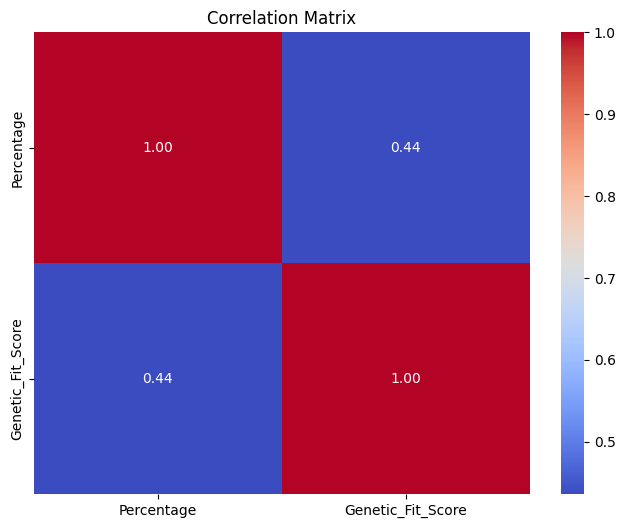

In [133]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("genetic_ancestry_data.csv")  # Assuming the file is named "data.csv"

# Clean column names
df.columns = [col.strip().replace(" ", "_") for col in df.columns]

# Convert 'Percentage' to numeric
df['Percentage'] = pd.to_numeric(df['Percentage'], errors='coerce')

# Extract numerical value from 'Genetic_Fit'
df['Genetic_Fit_Score'] = df['Genetic_Fit'].str.extract(r'([\d.]+)').astype(float)

# Summary statistics
print(df.describe())
print(df.info())
print(df.nunique())

# Bar chart: Ancestry distribution
fig1 = px.bar(df, x='Ancestry', y='Percentage', color='Time_Period', barmode='group',
              title='Ancestry Proportions Over Time')
fig1.show()

# Stacked bar chart: Showing ancestry proportions by population
df_grouped = df.groupby(['Population', 'Time_Period', 'Ancestry'])['Percentage'].sum().reset_index()
fig2 = px.bar(df_grouped, x='Time_Period', y='Percentage', color='Ancestry',
              title='Ancestry Contribution Over Time', text='Ancestry')
fig2.show()

# Box plot: Distribution of Percentage across different time periods
fig3 = px.box(df, x='Time_Period', y='Percentage', color='Population', title='Percentage Distribution by Time Period')
fig3.show()

# Scatter plot: Genetic Fit vs. Percentage
fig4 = px.scatter(df, x='Genetic_Fit_Score', y='Percentage', color='Time_Period',
                  title='Genetic Fit vs Percentage')
fig4.show()

# Heatmap: Correlation between numeric variables
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Percentage', 'Genetic_Fit_Score']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [134]:
fig6 = px.sunburst(df, path=['Population', 'Time_Period', 'Ancestry'], values='Percentage',
                   title='Hierarchical View of Population, Time Period, and Ancestry')
fig6.show()


In [63]:
fig7 = px.parallel_categories(df, dimensions=['Population', 'Time_Period', 'Ancestry'],
                              color='Percentage', color_continuous_scale=px.colors.sequential.Viridis,
                              title='Relationships between Population, Time Period, and Ancestry',
                              height=2500, width=1500)

fig7.update_layout(
    coloraxis_colorbar=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1,
        title=dict(text='Percentage', side='top')
    ),
    margin=dict(t=120)
)

fig7.show()



In [135]:
fig8 = px.scatter(df, x='Genetic_Fit_Score', y='Percentage', size='Percentage',
                  color='Ancestry', hover_name='Ancestry',
                  title='Genetic Fit vs Percentage with Time Period',
                  height=1900, width=1200)  # Added width parameter
fig8.show()



In [75]:
fig9 = px.violin(df, x='Population', y='Percentage', color='Time_Period', box=True, points="all",
                 title='Distribution of Percentages by Population and Time Period')
fig9.show()


In [90]:
fig9 = px.violin(df, x='Ancestry', y='Percentage', color='Time_Period', box=True, points="all",

                 title='Distribution of Percentages by Population and Time Period',height=1000, width=2000)
fig9.show()


In [93]:
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
from scipy import stats

# Assuming df is your DataFrame with the genetic ancestry data

fig = go.Figure()

# Add scatter plots for each Time Period
for time_period in df['Time_Period'].unique():
    subset = df[df['Time_Period'] == time_period]
    fig.add_trace(go.Scatter(
        x=subset['Genetic_Fit_Score'],
        y=subset['Percentage'],
        mode='markers',
        name=time_period,
        marker=dict(size=8)
    ))

# Add trend line
x_range = np.linspace(df['Genetic_Fit_Score'].min(), df['Genetic_Fit_Score'].max(), 100)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Genetic_Fit_Score'], df['Percentage'])
y_range = slope * x_range + intercept

fig.add_trace(go.Scatter(
    x=x_range,
    y=y_range,
    mode='lines',
    name='Trend Line',
    line=dict(color='black', dash='dash')
))

# Update layout
fig.update_layout(
    title='Genetic Fit Score vs Percentage by Time Period',
    xaxis_title='Genetic Fit Score',
    yaxis_title='Percentage',
    height=600,
    width=1000,
    legend_title='Time Period'
)

fig.show()


In [94]:
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame with the genetic ancestry data

# Group the data by Time_Period and calculate the mean Percentage
df_grouped = df.groupby('Time_Period')['Percentage'].mean().reset_index()

# Sort the Time_Periods chronologically (you may need to adjust this based on your specific Time_Periods)
time_order = ['Bronze age', 'Iron age', 'Late antiquity', 'Middle ages']
df_grouped['Time_Period'] = pd.Categorical(df_grouped['Time_Period'], categories=time_order, ordered=True)
df_grouped = df_grouped.sort_values('Time_Period')

# Create the funnel plot
fig = px.funnel(df_grouped, x='Percentage', y='Time_Period', title='Genetic Ancestry Percentage by Time Period')

# Update layout for better readability
fig.update_layout(
    width=800,
    height=500,
    yaxis_title='Time Period',
    xaxis_title='Average Percentage'
)

fig.show()


In [99]:
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame with the genetic ancestry data

# Group the data by Ancestry and calculate the mean Percentage
df_grouped = df.groupby('Ancestry')['Percentage'].mean().reset_index()

# Sort the Ancestries in descending order of mean Percentage
df_grouped = df_grouped.sort_values('Percentage', ascending=False)

# Create the funnel plot
fig = px.funnel(df_grouped, x='Percentage', y='Ancestry', title='Genetic Ancestry Percentage')

# Update layout for better readability
fig.update_layout(
    width=800,
    height=1000,
    yaxis_title='Ancestry',
    xaxis_title='Average Percentage'
)

fig.show()


In [104]:
import plotly.express as px
import pandas as pd

# Assuming df is your DataFrame with the genetic ancestry data

# Group the data by Ancestry and calculate the mean Percentage
df_grouped = df.groupby('Ancestry')['Genetic_Fit_Score'].mean().reset_index()

# Sort the Ancestries in descending order of mean Percentage
df_grouped = df_grouped.sort_values('Genetic_Fit_Score', ascending=False)

# Create the funnel plot
fig = px.funnel(df_grouped, x='Genetic_Fit_Score', y='Ancestry', title='Genetic Ancestry Genetic_Fit_Score')

# Update layout for better readability
fig.update_layout(
    width=800,
    height=2000,
    yaxis_title='Ancestry',
    xaxis_title='Average Genetic_Fit_Score'
)

fig.show()


In [105]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Assuming df is your DataFrame with the genetic ancestry data

# Group the data by Ancestry and calculate the mean Percentage and Genetic_Fit_Score
df_percentage = df.groupby('Ancestry')['Percentage'].mean().reset_index().sort_values('Percentage', ascending=False)
df_fit_score = df.groupby('Ancestry')['Genetic_Fit_Score'].mean().reset_index().sort_values('Genetic_Fit_Score', ascending=False)

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Genetic Ancestry Percentage", "Genetic Ancestry Fit Score"))

# Add percentage funnel
fig.add_trace(go.Funnel(
    name = 'Percentage',
    y = df_percentage['Ancestry'],
    x = df_percentage['Percentage'],
    textposition = "inside",
    textinfo = "value+percent initial"
), row=1, col=1)

# Add fit score funnel
fig.add_trace(go.Funnel(
    name = 'Genetic Fit Score',
    y = df_fit_score['Ancestry'],
    x = df_fit_score['Genetic_Fit_Score'],
    textposition = "inside",
    textinfo = "value+percent initial"
), row=1, col=2)

# Update layout
fig.update_layout(
    width=1600,
    height=1000,
    title_text="Genetic Ancestry Analysis",
    showlegend=False
)

# Update axes
fig.update_xaxes(title_text="Average Percentage", row=1, col=1)
fig.update_xaxes(title_text="Average Genetic Fit Score", row=1, col=2)
fig.update_yaxes(title_text="Ancestry", row=1, col=1)
fig.update_yaxes(title_text="Ancestry", row=1, col=2)

fig.show()


In [117]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Group the data by Ancestry and calculate the mean Percentage and Genetic_Fit_Score
df_grouped = df.groupby('Ancestry').agg({
    'Percentage': 'mean',
    'Genetic_Fit_Score': 'mean'
}).reset_index()

# Sort the data by Genetic_Fit_Score in descending order
df_sorted = df_grouped.sort_values('Genetic_Fit_Score', ascending=False)

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Genetic Ancestry Percentage", "Genetic Ancestry Fit Score"))

# Add percentage funnel
fig.add_trace(go.Funnel(
    name = 'Percentage',
    y = df_sorted['Ancestry'],
    x = df_sorted['Percentage'],
    textposition = "inside",
    textinfo = "value+percent initial"
), row=1, col=1)

# Add fit score funnel
fig.add_trace(go.Funnel(
    name = 'Genetic Fit Score',
    y = df_sorted['Ancestry'],
    x = df_sorted['Genetic_Fit_Score'],
    textposition = "inside",
    textinfo = "value+percent initial"
), row=1, col=2)

# Update layout
fig.update_layout(
    width=1600,
    height=1000,
    title_text="Genetic Ancestry Analysis",
    showlegend=False
)

# Update axes
fig.update_xaxes(title_text="Average Percentage", row=1, col=1)
fig.update_xaxes(title_text="Average Genetic Fit Score", row=1, col=2)
fig.update_yaxes(title_text="Ancestry", row=1, col=1)
fig.update_yaxes(title_text="Ancestry", row=1, col=2)

fig.show()


In [136]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Group the data by Ancestry and calculate the mean Percentage and Genetic_Fit_Score
df_grouped = df.groupby('Ancestry').agg({
    'Percentage': 'mean',
    'Genetic_Fit_Score': 'mean'
}).reset_index()

# Sort the data by Genetic_Fit_Score in descending order
df_sorted = df_grouped.sort_values('Genetic_Fit_Score', ascending=False)

# Define color mapping based on Genetic Fit Score ranges
def get_color(score):
    if score <= 3:
        return 'green'  # very close (1-3)
    elif score <= 5:
        return 'blue'   # close (3-5)
    elif score <= 10:
        return 'orange' # moderate (5-10)
    else:
        return 'red'    # distant (>10)

# Create colors list for each bar
colors = [get_color(score) for score in df_sorted['Genetic_Fit_Score']]

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Genetic Ancestry Percentage", "Genetic Ancestry Fit Score"))

# Add percentage funnel (unchanged)
fig.add_trace(go.Funnel(
    name = 'Percentage',
    y = df_sorted['Ancestry'],
    x = df_sorted['Percentage'],
    textposition = "inside",
    textinfo = "value+percent initial"
), row=1, col=1)

# Add fit score funnel with colors
fig.add_trace(go.Funnel(
    name = 'Genetic Fit Score',
    y = df_sorted['Ancestry'],
    x = df_sorted['Genetic_Fit_Score'],
    textposition = "inside",
    textinfo = "value+percent initial",
    marker = {"color": colors}  # Add color mapping here
), row=1, col=2)

# Update layout
fig.update_layout(
    width=1600,
    height=1500,
    title_text="Genetic Ancestry Analysis",
    showlegend=False
)

# Update axes
fig.update_xaxes(title_text="Average Percentage", row=1, col=1)
fig.update_xaxes(title_text="Average Genetic Fit Score", row=1, col=2)
fig.update_yaxes(title_text="Ancestry", row=1, col=1)
fig.update_yaxes(title_text="Ancestry", row=1, col=2)

fig.show()

In [124]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Group the data by Ancestry and calculate the mean Percentage and Genetic_Fit_Score
df_grouped = df.groupby('Ancestry').agg({
    'Percentage': 'mean',
    'Genetic_Fit_Score': 'mean'
}).reset_index()

# Sort the data by Genetic_Fit_Score in descending order
df_sorted = df_grouped.sort_values('Genetic_Fit_Score', ascending=False)

# Define color mapping based on Genetic Fit Score ranges
def get_color(score):
    if score <= 3:
        return 'green'  # very close (1-3)
    elif score <= 5:
        return 'blue'   # close (3-5)
    elif score <= 10:
        return 'orange' # moderate (5-10)
    else:
        return 'red'    # distant (>10)

# Create colors list for each bar
colors = [get_color(score) for score in df_sorted['Genetic_Fit_Score']]

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Genetic Ancestry Percentage", "Genetic Ancestry Fit Score"))

# Add percentage funnel
fig.add_trace(go.Funnel(
    name = 'Percentage',
    y = df_sorted['Ancestry'],
    x = df_sorted['Percentage'],
    textposition = "inside",
    textinfo = "value+percent initial"
), row=1, col=1)

# Add fit score funnel with colors
fig.add_trace(go.Funnel(
    name = 'Genetic Fit Score',
    y = df_sorted['Ancestry'],
    x = df_sorted['Genetic_Fit_Score'],
    textposition = "inside",
    textinfo = "value+percent initial",
    marker = {"color": colors}
), row=1, col=2)

# Update layout
fig.update_layout(
    width=1600,
    height=2000,
    title_text="Genetic Ancestry Analysis",
    showlegend=False
)

# Update axes
fig.update_xaxes(title_text="Average Percentage", row=1, col=1)
fig.update_xaxes(title_text="Average Genetic Fit Score", row=1, col=2)
fig.update_yaxes(title_text="Ancestry", row=1, col=1)
fig.update_yaxes(title_text="Ancestry", row=1, col=2)

# Save as HTML file
fig.write_html("genetic_ancestry_analysis.html")

# Optionally still show the plot
fig.show()

In [137]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Group the data by Ancestry and calculate the mean Percentage and Genetic_Fit_Score
df_grouped = df.groupby('Population').agg({
    'Percentage': 'mean',
    'Genetic_Fit_Score': 'mean'
}).reset_index()

# Sort the data by Genetic_Fit_Score in descending order
df_sorted = df_grouped.sort_values('Genetic_Fit_Score', ascending=False)

# Define color mapping based on Genetic Fit Score ranges
def get_color(score):
    if score <= 3:
        return 'green'  # very close (1-3)
    elif score <= 5:
        return 'blue'   # close (3-5)
    elif score <= 10:
        return 'orange' # moderate (5-10)
    else:
        return 'red'    # distant (>10)

# Create colors list for each bar
colors = [get_color(score) for score in df_sorted['Genetic_Fit_Score']]

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Genetic Ancestry Percentage", "Genetic Ancestry Fit Score"))

# Add percentage funnel
fig.add_trace(go.Funnel(
    name = 'Percentage',
    y = df_sorted['Population'],
    x = df_sorted['Percentage'],
    textposition = "inside",
    textinfo = "value+percent initial"
), row=1, col=1)

# Add fit score funnel with colors
fig.add_trace(go.Funnel(
    name = 'Genetic Fit Score',
    y = df_sorted['Population'],
    x = df_sorted['Genetic_Fit_Score'],
    textposition = "inside",
    textinfo = "value+percent initial",
    marker = {"color": colors}
), row=1, col=2)

# Update layout
fig.update_layout(
    width=1600,
    height=2000,
    title_text="Genetic Ancestry Analysis",
    showlegend=False
)

# Update axes
fig.update_xaxes(title_text="Average Percentage", row=1, col=1)
fig.update_xaxes(title_text="Average Genetic Fit Score", row=1, col=2)
fig.update_yaxes(title_text="Population", row=1, col=1)
fig.update_yaxes(title_text="Population", row=1, col=2)

# Save as HTML file
fig.write_html("genetic_Population_analysis_population.html")

# Optionally still show the plot
fig.show()

In [129]:
import json
import csv

# Load the JSON data
with open('fulldata.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# Extract and print all unique population names
population_names = list(data.keys())
print("Unique Population Names:", population_names)

# Prepare the CSV file
csv_filename = 'genetic_ancestry_data.csv'
csv_headers = ['Population', 'Time Period', 'Genetic Fit', 'Ancestry', 'Percentage']

# Open the CSV file and write the data
with open(csv_filename, 'w', newline='', encoding='utf-8') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=csv_headers)
    writer.writeheader()

    # Iterate through the JSON data and write rows to the CSV
    for population, periods in data.items():
        for period, details in periods.items():
            genetic_fit = details.get('genetic_fit', 'N/A')  # Default if missing
            for ancestry in details.get('ancestries', []):  # Handle missing keys
                writer.writerow({
                    'Population': population,
                    'Time Period': period,
                    'Genetic Fit': genetic_fit,
                    'Ancestry': ancestry.get('name', 'Unknown'),
                    'Percentage': ancestry.get('percentage', 0)
                })

print(f"CSV file '{csv_filename}' has been created successfully.")


Unique Population Names: ['Mizrahi Jew', 'Ashkenazi Jew', 'Sephardic Jew', 'Levant', 'Arabian Peninsula', 'Global', 'Northwest Europe (Netherlands, Belgium)', 'Baltic', 'Greece & Cyprus', 'Iberia', 'North Italy', 'South Italy', 'Central Europe (Germany, Switzerland, Austria)', 'Crimean Tatar & Nogai', 'East Europe', 'Balkan East (Romania, Bulgaria, Moldova, Macedonia)', 'Balkan West (Albania, Bosnia, Croatia, Kosovo, Montenegro, Serbia, Slovenia)', 'North France', 'Great Britain & Ireland', 'Iceland', 'Scandinavia East (Sweden, Finland)', 'Scandinavia West (Norway, Denmark)', 'Breton', 'Japan', 'Mongolia & East Siberia', 'Anatolian Turks & Greeks', 'Azerbaijan', 'Caucasus', 'Iran & Iraq', 'Indian Subcontinent', 'Central Asia', 'China', 'Aboriginal Australia', 'America & Australia, Latin America', 'America & Australia, Carribean', 'America & Australia, Micronesia, Melanesia & Polynesia', 'Africa, East Africa (Ethiopia, Somalia, Eritrea)', 'Africa, Egypt', 'Africa, North Africa', 'Africa

In [132]:
import json
import csv

# Load the JSON data
with open('fulldata.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# Remove "Global" from the population list
filtered_data = {pop: details for pop, details in data.items() if pop != "Global"}

# Extract and print all unique population names (excluding "Global")
population_names = list(filtered_data.keys())
print("Unique Population Names:", population_names)

# Prepare the CSV file
csv_filename = 'genetic_ancestry_data.csv'
csv_headers = ['Population', 'Time Period', 'Genetic Fit', 'Ancestry', 'Percentage']

# Open the CSV file and write the data
with open(csv_filename, 'w', newline='', encoding='utf-8') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=csv_headers)
    writer.writeheader()

    # Iterate through the filtered JSON data and write rows to the CSV
    for population, periods in filtered_data.items():
        for period, details in periods.items():
            genetic_fit = details.get('genetic_fit', 'N/A')  # Default if missing
            for ancestry in details.get('ancestries', []):  # Handle missing keys
                writer.writerow({
                    'Population': population,
                    'Time Period': period,
                    'Genetic Fit': genetic_fit,
                    'Ancestry': ancestry.get('name', 'Unknown'),
                    'Percentage': ancestry.get('percentage', 0)
                })

print(f"CSV file '{csv_filename}' has been created successfully.")


Unique Population Names: ['Mizrahi Jew', 'Ashkenazi Jew', 'Sephardic Jew', 'Levant', 'Arabian Peninsula', 'Northwest Europe (Netherlands, Belgium)', 'Baltic', 'Greece & Cyprus', 'Iberia', 'North Italy', 'South Italy', 'Central Europe (Germany, Switzerland, Austria)', 'Crimean Tatar & Nogai', 'East Europe', 'Balkan East (Romania, Bulgaria, Moldova, Macedonia)', 'Balkan West (Albania, Bosnia, Croatia, Kosovo, Montenegro, Serbia, Slovenia)', 'North France', 'Great Britain & Ireland', 'Iceland', 'Scandinavia East (Sweden, Finland)', 'Scandinavia West (Norway, Denmark)', 'Breton', 'Japan', 'Mongolia & East Siberia', 'Anatolian Turks & Greeks', 'Azerbaijan', 'Caucasus', 'Iran & Iraq', 'Indian Subcontinent', 'Central Asia', 'China', 'Aboriginal Australia', 'America & Australia, Latin America', 'America & Australia, Carribean', 'America & Australia, Micronesia, Melanesia & Polynesia', 'Africa, East Africa (Ethiopia, Somalia, Eritrea)', 'Africa, Egypt', 'Africa, North Africa', 'Africa, Central 

In [138]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define regions with their approximate center coordinates
regions = {
    "Sub-Saharan Africa": {"lat": 0, "lon": 20, "color": "darkgreen"},
    "North Africa": {"lat": 25, "lon": 10, "color": "green"},
    "Middle East/West Asia": {"lat": 35, "lon": 40, "color": "darkred"},
    "Central Asia": {"lat": 45, "lon": 65, "color": "crimson"},
    "East Asia": {"lat": 35, "lon": 105, "color": "gold"},
    "South Asia": {"lat": 20, "lon": 75, "color": "orange"},
    "Eastern Europe": {"lat": 50, "lon": 30, "color": "royalblue"},
    "Southern Europe": {"lat": 40, "lon": 15, "color": "blue"},
    "Western Europe": {"lat": 50, "lon": 5, "color": "lightblue"},
    "Northern Europe": {"lat": 60, "lon": 15, "color": "skyblue"},
    "Americas": {"lat": 10, "lon": -75, "color": "purple"},
    "Australia/Oceania": {"lat": -25, "lon": 135, "color": "magenta"}
}

# Define migration paths based on the document analysis
# Format: [from_region, to_region, strength, approximate_time_period]
migration_paths = [
    ["Sub-Saharan Africa", "North Africa", 0.8, "Ancient"],
    ["Sub-Saharan Africa", "Middle East/West Asia", 0.9, "Ancient-Medieval"],
    ["North Africa", "Middle East/West Asia", 0.7, "Ancient"],
    ["Middle East/West Asia", "Central Asia", 0.9, "Ancient-Medieval"],
    ["Middle East/West Asia", "South Asia", 0.8, "Ancient"],
    ["Middle East/West Asia", "Eastern Europe", 0.8, "Medieval"],
    ["Middle East/West Asia", "Southern Europe", 0.7, "Medieval"],
    ["Central Asia", "East Asia", 0.8, "Ancient-Medieval"],
    ["Central Asia", "Eastern Europe", 0.7, "Medieval"],
    ["East Asia", "Central Asia", 0.6, "Medieval"],
    ["South Asia", "East Asia", 0.5, "Ancient"],
    ["Central Asia", "Western Europe", 0.4, "Medieval"],
    ["Eastern Europe", "Western Europe", 0.3, "Medieval"],
    ["Middle East/West Asia", "Americas", 0.3, "Recent"],
    ["Middle East/West Asia", "Australia/Oceania", 0.3, "Recent"]
]

# Create a time-ordered list of migration phases
time_periods = ["Ancient (Before 500 BC)", "Classical (500 BC - 500 AD)",
                "Medieval (500 AD - 1500 AD)", "Recent (After 1500 AD)"]

# Create figure
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "scattergeo", "rowspan": 2, "colspan": 2}, None],
           [None, None]],
    subplot_titles=["Ancestral Migration Paths"])

# Create base map
fig.add_trace(
    go.Scattergeo(
        locationmode='ISO-3',
        lon=[regions[r]["lon"] for r in regions],
        lat=[regions[r]["lat"] for r in regions],
        text=[r for r in regions],
        mode='markers',
        marker=dict(
            size=10,
            color=[regions[r]["color"] for r in regions],
            line=dict(width=1, color='black')
        ),
        name='Key Regions'
    )
)

# Add migration paths
for path in migration_paths:
    from_region, to_region, strength, time = path
    # Calculate line thickness based on migration strength
    line_width = strength * 5

    # Get coordinates
    from_lon = regions[from_region]["lon"]
    from_lat = regions[from_region]["lat"]
    to_lon = regions[to_region]["lon"]
    to_lat = regions[to_region]["lat"]

    # Calculate intermediate points for curved lines
    # More points for longer distances
    distance = np.sqrt((to_lon - from_lon)**2 + (to_lat - from_lat)**2)
    num_points = max(10, int(distance/10))

    # Create curved path
    t = np.linspace(0, 1, num_points)
    # Add some curvature
    mid_lon = (from_lon + to_lon) / 2
    mid_lat = (from_lat + to_lat) / 2
    # Add curvature based on longitude difference
    curve_height = (to_lon - from_lon) * 0.1

    # Path coordinates
    path_lons = [from_lon + (to_lon - from_lon) * ti for ti in t]
    path_lats = [from_lat + (to_lat - from_lat) * ti + curve_height * np.sin(np.pi * ti) for ti in t]

    # Add the path
    fig.add_trace(
        go.Scattergeo(
            locationmode='ISO-3',
            lon=path_lons,
            lat=path_lats,
            mode='lines',
            line=dict(
                width=line_width,
                color=regions[from_region]["color"]
            ),
            opacity=0.7,
            name=f'{from_region} → {to_region} ({time})',
            showlegend=True
        )
    )

# Annotations for key genetic groups
annotations = [
    dict(
        x=regions["Sub-Saharan Africa"]["lon"] - 10,
        y=regions["Sub-Saharan Africa"]["lat"] + 5,
        text="Sub-Saharan African<br>Central & Western Africa",
        showarrow=True,
        arrowhead=1,
        ax=-30,
        ay=-30
    ),
    dict(
        x=regions["Middle East/West Asia"]["lon"] + 5,
        y=regions["Middle East/West Asia"]["lat"] - 3,
        text="Levantine, Arabian Peninsula,<br>Roman Anatolia (100 BC-AD 700)",
        showarrow=True,
        arrowhead=1,
        ax=30,
        ay=30
    ),
    dict(
        x=regions["Central Asia"]["lon"] - 5,
        y=regions["Central Asia"]["lat"] + 5,
        text="Sarmatian (530-250 BC)<br>Turkic (AD 650-1200)<br>Scythian (750-110 BC)",
        showarrow=True,
        arrowhead=1,
        ax=-30,
        ay=-30
    ),
    dict(
        x=regions["East Asia"]["lon"] + 10,
        y=regions["East Asia"]["lat"] - 5,
        text="Sinitic (1230 BC-AD 1670)<br>Yellow River (2300-1900 BC)",
        showarrow=True,
        arrowhead=1,
        ax=30,
        ay=30
    ),
    dict(
        x=regions["Eastern Europe"]["lon"] - 5,
        y=regions["Eastern Europe"]["lat"] + 5,
        text="Balkan, Slavic (AD 540-1100)",
        showarrow=True,
        arrowhead=1,
        ax=-30,
        ay=-30
    )
]

# Update layout
fig.update_layout(
    title_text='Ancestral Migration Paths Based on Genetic Analysis',
    showlegend=True,
    legend_title_text='Migration Paths',
    geo=dict(
        scope='world',
        projection_type='natural earth',
        showland=True,
        landcolor='rgb(243, 243, 243)',
        countrycolor='rgb(204, 204, 204)',
        showocean=True,
        oceancolor='rgb(230, 230, 250)',
        showlakes=True,
        lakecolor='rgb(230, 230, 250)',
        showrivers=True,
        rivercolor='rgb(230, 230, 250)'
    ),
    annotations=annotations,
    height=800,
    width=1200
)

# Create a second visualization as a time-based migration model
fig2 = make_subplots(rows=1, cols=1)

# Create nodes for regions
nodes = []
for i, region_name in enumerate(regions):
    nodes.append(dict(
        x=i,
        y=0,
        name=region_name,
        marker=dict(
            color=regions[region_name]["color"],
            size=20,
            line=dict(width=2, color='black')
        ),
        text=region_name
    ))

# Define time periods and their y-coordinates
time_y = {
    "Ancient": 3,
    "Classical": 2,
    "Medieval": 1,
    "Recent": 0
}

# Create timeline migration figure
fig_timeline = go.Figure()

# Add regions as nodes at the bottom
for i, region_name in enumerate(regions):
    spacing = len(regions) * 10
    x_pos = i * (spacing / len(regions))
    fig_timeline.add_trace(
        go.Scatter(
            x=[x_pos],
            y=[0],
            mode='markers+text',
            marker=dict(
                size=20,
                color=regions[region_name]["color"],
                line=dict(width=1, color='black')
            ),
            text=region_name,
            textposition="bottom center",
            name=region_name
        )
    )

# Add migration paths across time
for path in migration_paths:
    from_region, to_region, strength, time_period = path

    # Get region indexes
    from_idx = list(regions.keys()).index(from_region)
    to_idx = list(regions.keys()).index(to_region)

    # Calculate positions
    spacing = len(regions) * 10
    x1 = from_idx * (spacing / len(regions))
    x2 = to_idx * (spacing / len(regions))

    # Determine y position based on time period
    if "Ancient" in time_period:
        y = 3
    elif "Classical" in time_period:
        y = 2
    elif "Medieval" in time_period:
        y = 1
    else:
        y = 0.5

    # Add connection
    fig_timeline.add_trace(
        go.Scatter(
            x=[x1, (x1+x2)/2, x2],
            y=[0, y, 0],
            mode='lines',
            line=dict(
                width=strength * 5,
                color=regions[from_region]["color"]
            ),
            opacity=0.7,
            name=f'{from_region} → {to_region} ({time_period})',
            showlegend=True
        )
    )

# Add time period labels
for period, y in time_y.items():
    fig_timeline.add_annotation(
        x=spacing + 5,
        y=y,
        text=period,
        showarrow=False,
        xanchor='left'
    )

# Update timeline layout
fig_timeline.update_layout(
    title="Temporal Migration Model",
    showlegend=False,
    xaxis=dict(
        showticklabels=False,
        showgrid=False,
        zeroline=False
    ),
    yaxis=dict(
        showticklabels=False,
        showgrid=False,
        zeroline=False,
        range=[-1, 4]
    ),
    height=600,
    width=1200
)

# Display both figures
fig.show()
fig_timeline.show()

# Write a summary of the migration paths
print("""
Migration Summary Based on Genetic Analysis:

1. Primary Origin: Sub-Saharan Africa (Central and Western regions)
   - Strong genetic ties to Sub-Saharan African groups

2. Early Migrations:
   - From Sub-Saharan Africa to the Middle East/West Asia
   - Possibly through the Horn of Africa or Nile Valley
   - Likely influenced by ancient trade routes or the slave trade

3. Middle Eastern Expansions:
   - Significant presence in the Levant, Arabian Peninsula, and Anatolia
   - Key ancestral groups: Levantine (AD 300-1300), Roman Anatolia (100 BC-AD 700)
   - Middle East served as a crucial crossroads for further migrations

4. Asian Spread:
   - From Middle East to Central Asia (Sarmatian, Scythian groups)
   - Central Asian nomadic groups moving into East Asia
   - Connections to Yellow River (2300-1900 BC) and Sinitic (1230 BC-AD 1670) populations
   - South Asian ties through Indus Valley Civilization (3100-2000 BC)
   - Likely influenced by Silk Road trade and nomadic migrations

5. European Connections:
   - Stronger ties to Eastern and Southern Europe (Balkans, Slavic regions)
   - Weaker connections to Western and Northern Europe
   - Likely introduced through nomadic invasions from Central Asia
   - Historical interactions via the Byzantine or Ottoman Empires

6. Unexpected Connections:
   - Ties to American & Australian groups (Caribbean, Micronesia, Melanesia & Polynesia, Aboriginal Australia)
   - May reflect ancient migrations or genetic testing nuances

This visualization represents the most likely migration paths based on the provided genetic data, with line thickness indicating the strength of genetic connections between regions.
""")


Migration Summary Based on Genetic Analysis:

1. Primary Origin: Sub-Saharan Africa (Central and Western regions)
   - Strong genetic ties to Sub-Saharan African groups

2. Early Migrations:
   - From Sub-Saharan Africa to the Middle East/West Asia
   - Possibly through the Horn of Africa or Nile Valley
   - Likely influenced by ancient trade routes or the slave trade

3. Middle Eastern Expansions:
   - Significant presence in the Levant, Arabian Peninsula, and Anatolia
   - Key ancestral groups: Levantine (AD 300-1300), Roman Anatolia (100 BC-AD 700)
   - Middle East served as a crucial crossroads for further migrations

4. Asian Spread:
   - From Middle East to Central Asia (Sarmatian, Scythian groups)
   - Central Asian nomadic groups moving into East Asia
   - Connections to Yellow River (2300-1900 BC) and Sinitic (1230 BC-AD 1670) populations
   - South Asian ties through Indus Valley Civilization (3100-2000 BC)
   - Likely influenced by Silk Road trade and nomadic migrations

5.